# Prediction of Stock Price Direction

# Assignment
The task is to predict the day price direction of Amazon.com, Inc. (AMZN) stock.

The stock market is very complex and highly volatile. In order to be profitable, we do not need to predict the correct price, but rather, the price direction: whether it will be higher or lower than the price that is today. If we predict it to be higher, we might as well buy some stocks, else, we should probably sell.

Therefore, the target would be a binary classification whether the next day closing price will be higher than the opening price.

## Data Description
We have data for the period from 1997 up to year 2020 that we have split that into training (1997-2016), validation (2016-2018) and testing (2018-2020) periods. The data is available in the AMZN_train.csv, AMZN_val.csv and AMZN_test.csv files, respectively.

Each dataset has the same format with the following 7 columns:

Date - in format YYYY-MM-DD
Open - stock price upon opening of an exchange
High - the highest stock price on a given day
Low - the lowest stock price on a given day
Close - stock price at the end of a trading day
Adj Close - adjusted closing price that takes into account corporate actions
Volume - the amount of shares traded over the course of a trading day

## Practicalities
Define, train and evaluate a predictive model that takes as the input the data provided. Do not use external data for this project. You may use any algorithm of your choice or compare multiple models.

Make sure that the solution reflects your entire thought process - it is more important how the code is structured rather than the final metrics. You may assume that any model resulting in AUC > 0.515 will be enough. You are expected to spend no more than 3 hours working on this project.

#### To download the dataset <a href="https://drive.google.com/drive/folders/1KcJHVPDFKjJ4l7DAZGo_8141SieXpCB0?usp=sharing"> Click here </a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('AMZN_train.csv')
df2= pd.read_csv('AMZN_val.csv')
df3= pd.read_csv('AMZN_test.csv')

In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200
...,...,...,...,...,...,...,...
4776,2016-05-09,673.950012,686.979980,671.409973,679.750000,679.750000,3982200
4777,2016-05-10,694.000000,704.549988,693.500000,703.070007,703.070007,6105600
4778,2016-05-11,705.789978,719.000000,701.650024,713.229980,713.229980,7338200
4779,2016-05-12,717.380005,722.450012,711.510010,717.929993,717.929993,5048200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4781 entries, 0 to 4780
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4781 non-null   object 
 1   Open       4781 non-null   float64
 2   High       4781 non-null   float64
 3   Low        4781 non-null   float64
 4   Close      4781 non-null   float64
 5   Adj Close  4781 non-null   float64
 6   Volume     4781 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 261.6+ KB


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000,4.781000e+03
mean,127.619845,129.480122,125.697925,127.662449,127.662449,8.225935e+06
std,145.693083,147.132537,144.053633,145.677581,145.677581,7.810188e+06
min,1.406250,1.447917,1.312500,1.395833,1.395833,4.872000e+05
25%,34.299999,34.849998,33.660000,34.310001,34.310001,4.200900e+06
50%,62.880001,64.750000,60.937500,62.750000,62.750000,6.200100e+06
75%,189.009995,191.600006,186.210007,189.029999,189.029999,9.239900e+06
max,717.380005,722.450012,711.510010,717.929993,717.929993,1.043292e+08


In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df2['Date'] = pd.to_datetime(df2['Date'])
df3['Date'] = pd.to_datetime(df3['Date'])

In [7]:
df['Target'] = (df['Close'] > df['Open']).astype(int)
df2['Target'] = (df2['Close'] > df2['Open']).astype(int)
df3['Target'] = (df3['Close'] > df3['Open']).astype(int)

In [8]:
#feature engineering
df['Day'] = pd.to_datetime(df['Date']).dt.day
df['Month'] = pd.to_datetime(df['Date']).dt.month
df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Weekday'] = pd.to_datetime(df['Date']).dt.weekday

df2['Day'] = pd.to_datetime(df2['Date']).dt.day
df2['Month'] = pd.to_datetime(df2['Date']).dt.month
df2['Year'] = pd.to_datetime(df2['Date']).dt.year
df2['Weekday'] = pd.to_datetime(df2['Date']).dt.weekday

df3['Day'] = pd.to_datetime(df3['Date']).dt.day
df3['Month'] = pd.to_datetime(df3['Date']).dt.month
df3['Year'] = pd.to_datetime(df3['Date']).dt.year
df3['Weekday'] = pd.to_datetime(df3['Date']).dt.weekday


In [9]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Target,Day,Month,Year,Weekday
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000,0,15,5,1997,3
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000,0,16,5,1997,4
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800,0,19,5,1997,0
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200,0,20,5,1997,1
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200,0,21,5,1997,2
...,...,...,...,...,...,...,...,...,...,...,...,...
4776,2016-05-09,673.950012,686.979980,671.409973,679.750000,679.750000,3982200,1,9,5,2016,0
4777,2016-05-10,694.000000,704.549988,693.500000,703.070007,703.070007,6105600,1,10,5,2016,1
4778,2016-05-11,705.789978,719.000000,701.650024,713.229980,713.229980,7338200,1,11,5,2016,2
4779,2016-05-12,717.380005,722.450012,711.510010,717.929993,717.929993,5048200,1,12,5,2016,3


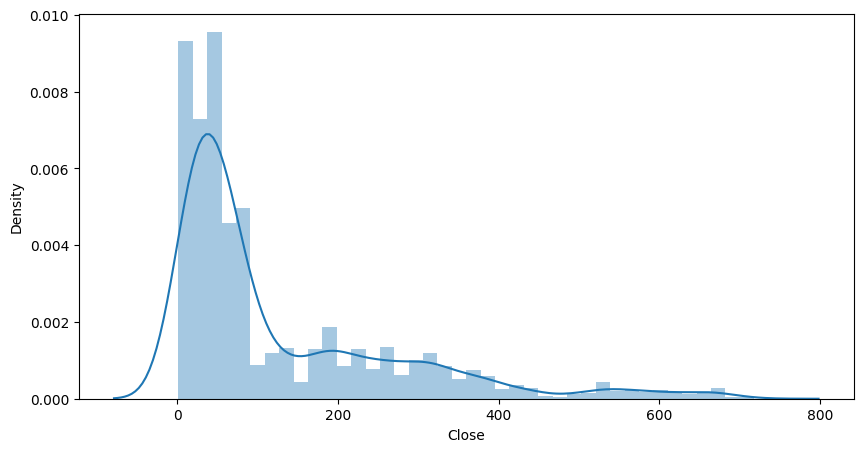

In [10]:
#dsitribution of close
plt.figure(figsize=(10,5))
sns.distplot(df['Close'])
plt.show()

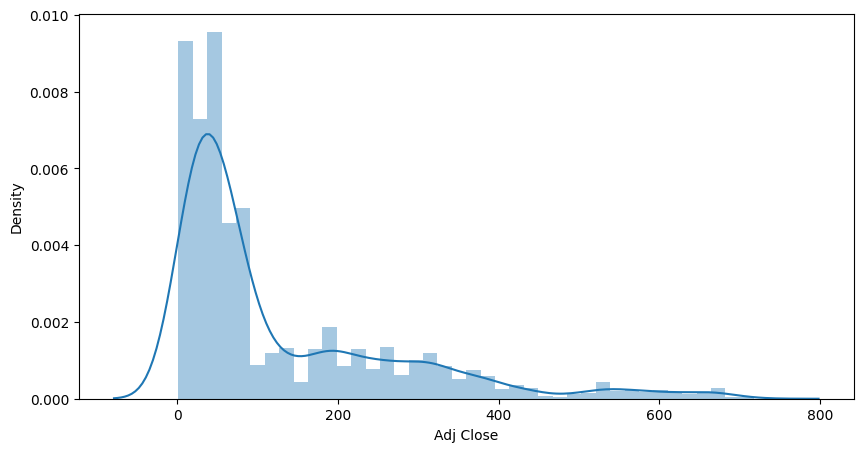

In [11]:
#dsitribution of adj close
plt.figure(figsize=(10,5))
sns.distplot(df['Adj Close'])
plt.show()


#observation
We can see close and adj close values are exactly same , so we can drop any one of the column

In [12]:
df.drop('Adj Close',axis=1,inplace=True)
df2.drop('Adj Close',axis=1,inplace=True)
df3.drop('Adj Close',axis=1,inplace=True)

In [13]:
df.drop('Date',axis=1,inplace=True)
df2.drop('Date',axis=1,inplace=True)
df3.drop('Date',axis=1,inplace=True)

In [14]:
df

,Open,High,Low,Close,Volume,Target,Day,Month,Year,Weekday
0,2.437500,2.500000,1.927083,1.958333,72156000,0,15,5,1997,3
1,1.968750,1.979167,1.708333,1.729167,14700000,0,16,5,1997,4
2,1.760417,1.770833,1.625000,1.708333,6106800,0,19,5,1997,0
3,1.729167,1.750000,1.635417,1.635417,5467200,0,20,5,1997,1
4,1.635417,1.645833,1.375000,1.427083,18853200,0,21,5,1997,2
...,...,...,...,...,...,...,...,...,...,...
4776,673.950012,686.979980,671.409973,679.750000,3982200,1,9,5,2016,0
4777,694.000000,704.549988,693.500000,703.070007,6105600,1,10,5,2016,1
4778,705.789978,719.000000,701.650024,713.229980,7338200,1,11,5,2016,2
4779,717.380005,722.450012,711.510010,717.929993,5048200,1,12,5,2016,3


In [15]:
#daily change
df['daily_change'] = df['Close'] - df['Open']
df2['daily_change'] = df2['Close'] - df2['Open']
df3['daily_change'] = df3['Close'] - df3['Open']

In [16]:
# High-Low Spread

df['spread'] = df['High'] - df['Low']
df2['spread'] = df2['High'] - df2['Low']
df3['spread'] = df3['High'] - df3['Low']

In [17]:
#Percent Change
df['percent_change'] = round(df['Close'] - df['Open']/df['Open'],2)*100
df2['percent_change'] = round(df2['Close'] - df2['Open']/df2['Open'],2)*100
df3['percent_change'] = round(df3['Close'] - df3['Open']/df3['Open'],2)*100

In [18]:
#Volatility
df['volatility'] = (df['High'] - df['Low'])/df['Open']
df2['volatility'] = (df2['High'] - df2['Low'])/df2['Open']
df3['volatility'] = (df3['High'] - df3['Low'])/df3['Open']

In [19]:
df

,Open,High,Low,Close,Volume,Target,Day,Month,Year,Weekday,daily_change,spread,percent_change,volatility
0,2.437500,2.500000,1.927083,1.958333,72156000,0,15,5,1997,3,-0.479167,0.572917,96.0,0.235043
1,1.968750,1.979167,1.708333,1.729167,14700000,0,16,5,1997,4,-0.239583,0.270834,73.0,0.137566
2,1.760417,1.770833,1.625000,1.708333,6106800,0,19,5,1997,0,-0.052084,0.145833,71.0,0.082840
3,1.729167,1.750000,1.635417,1.635417,5467200,0,20,5,1997,1,-0.093750,0.114583,64.0,0.066265
4,1.635417,1.645833,1.375000,1.427083,18853200,0,21,5,1997,2,-0.208334,0.270833,43.0,0.165605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4776,673.950012,686.979980,671.409973,679.750000,3982200,1,9,5,2016,0,5.799988,15.570007,67875.0,0.023103
4777,694.000000,704.549988,693.500000,703.070007,6105600,1,10,5,2016,1,9.070007,11.049988,70207.0,0.015922
4778,705.789978,719.000000,701.650024,713.229980,7338200,1,11,5,2016,2,7.440002,17.349976,71223.0,0.024582
4779,717.380005,722.450012,711.510010,717.929993,5048200,1,12,5,2016,3,0.549988,10.940002,71693.0,0.015250


In [20]:
df.tail()

,Open,High,Low,Close,Volume,Target,Day,Month,Year,Weekday,daily_change,spread,percent_change,volatility
4776,673.950012,686.979980,671.409973,679.750000,3982200,1,9,5,2016,0,5.799988,15.570007,67875.0,0.023103
4777,694.000000,704.549988,693.500000,703.070007,6105600,1,10,5,2016,1,9.070007,11.049988,70207.0,0.015922
4778,705.789978,719.000000,701.650024,713.229980,7338200,1,11,5,2016,2,7.440002,17.349976,71223.0,0.024582
4779,717.380005,722.450012,711.510010,717.929993,5048200,1,12,5,2016,3,0.549988,10.940002,71693.0,0.015250
4780,714.640015,719.250000,706.510010,709.919983,4763400,0,13,5,2016,4,-4.720032,12.739990,70892.0,0.017827


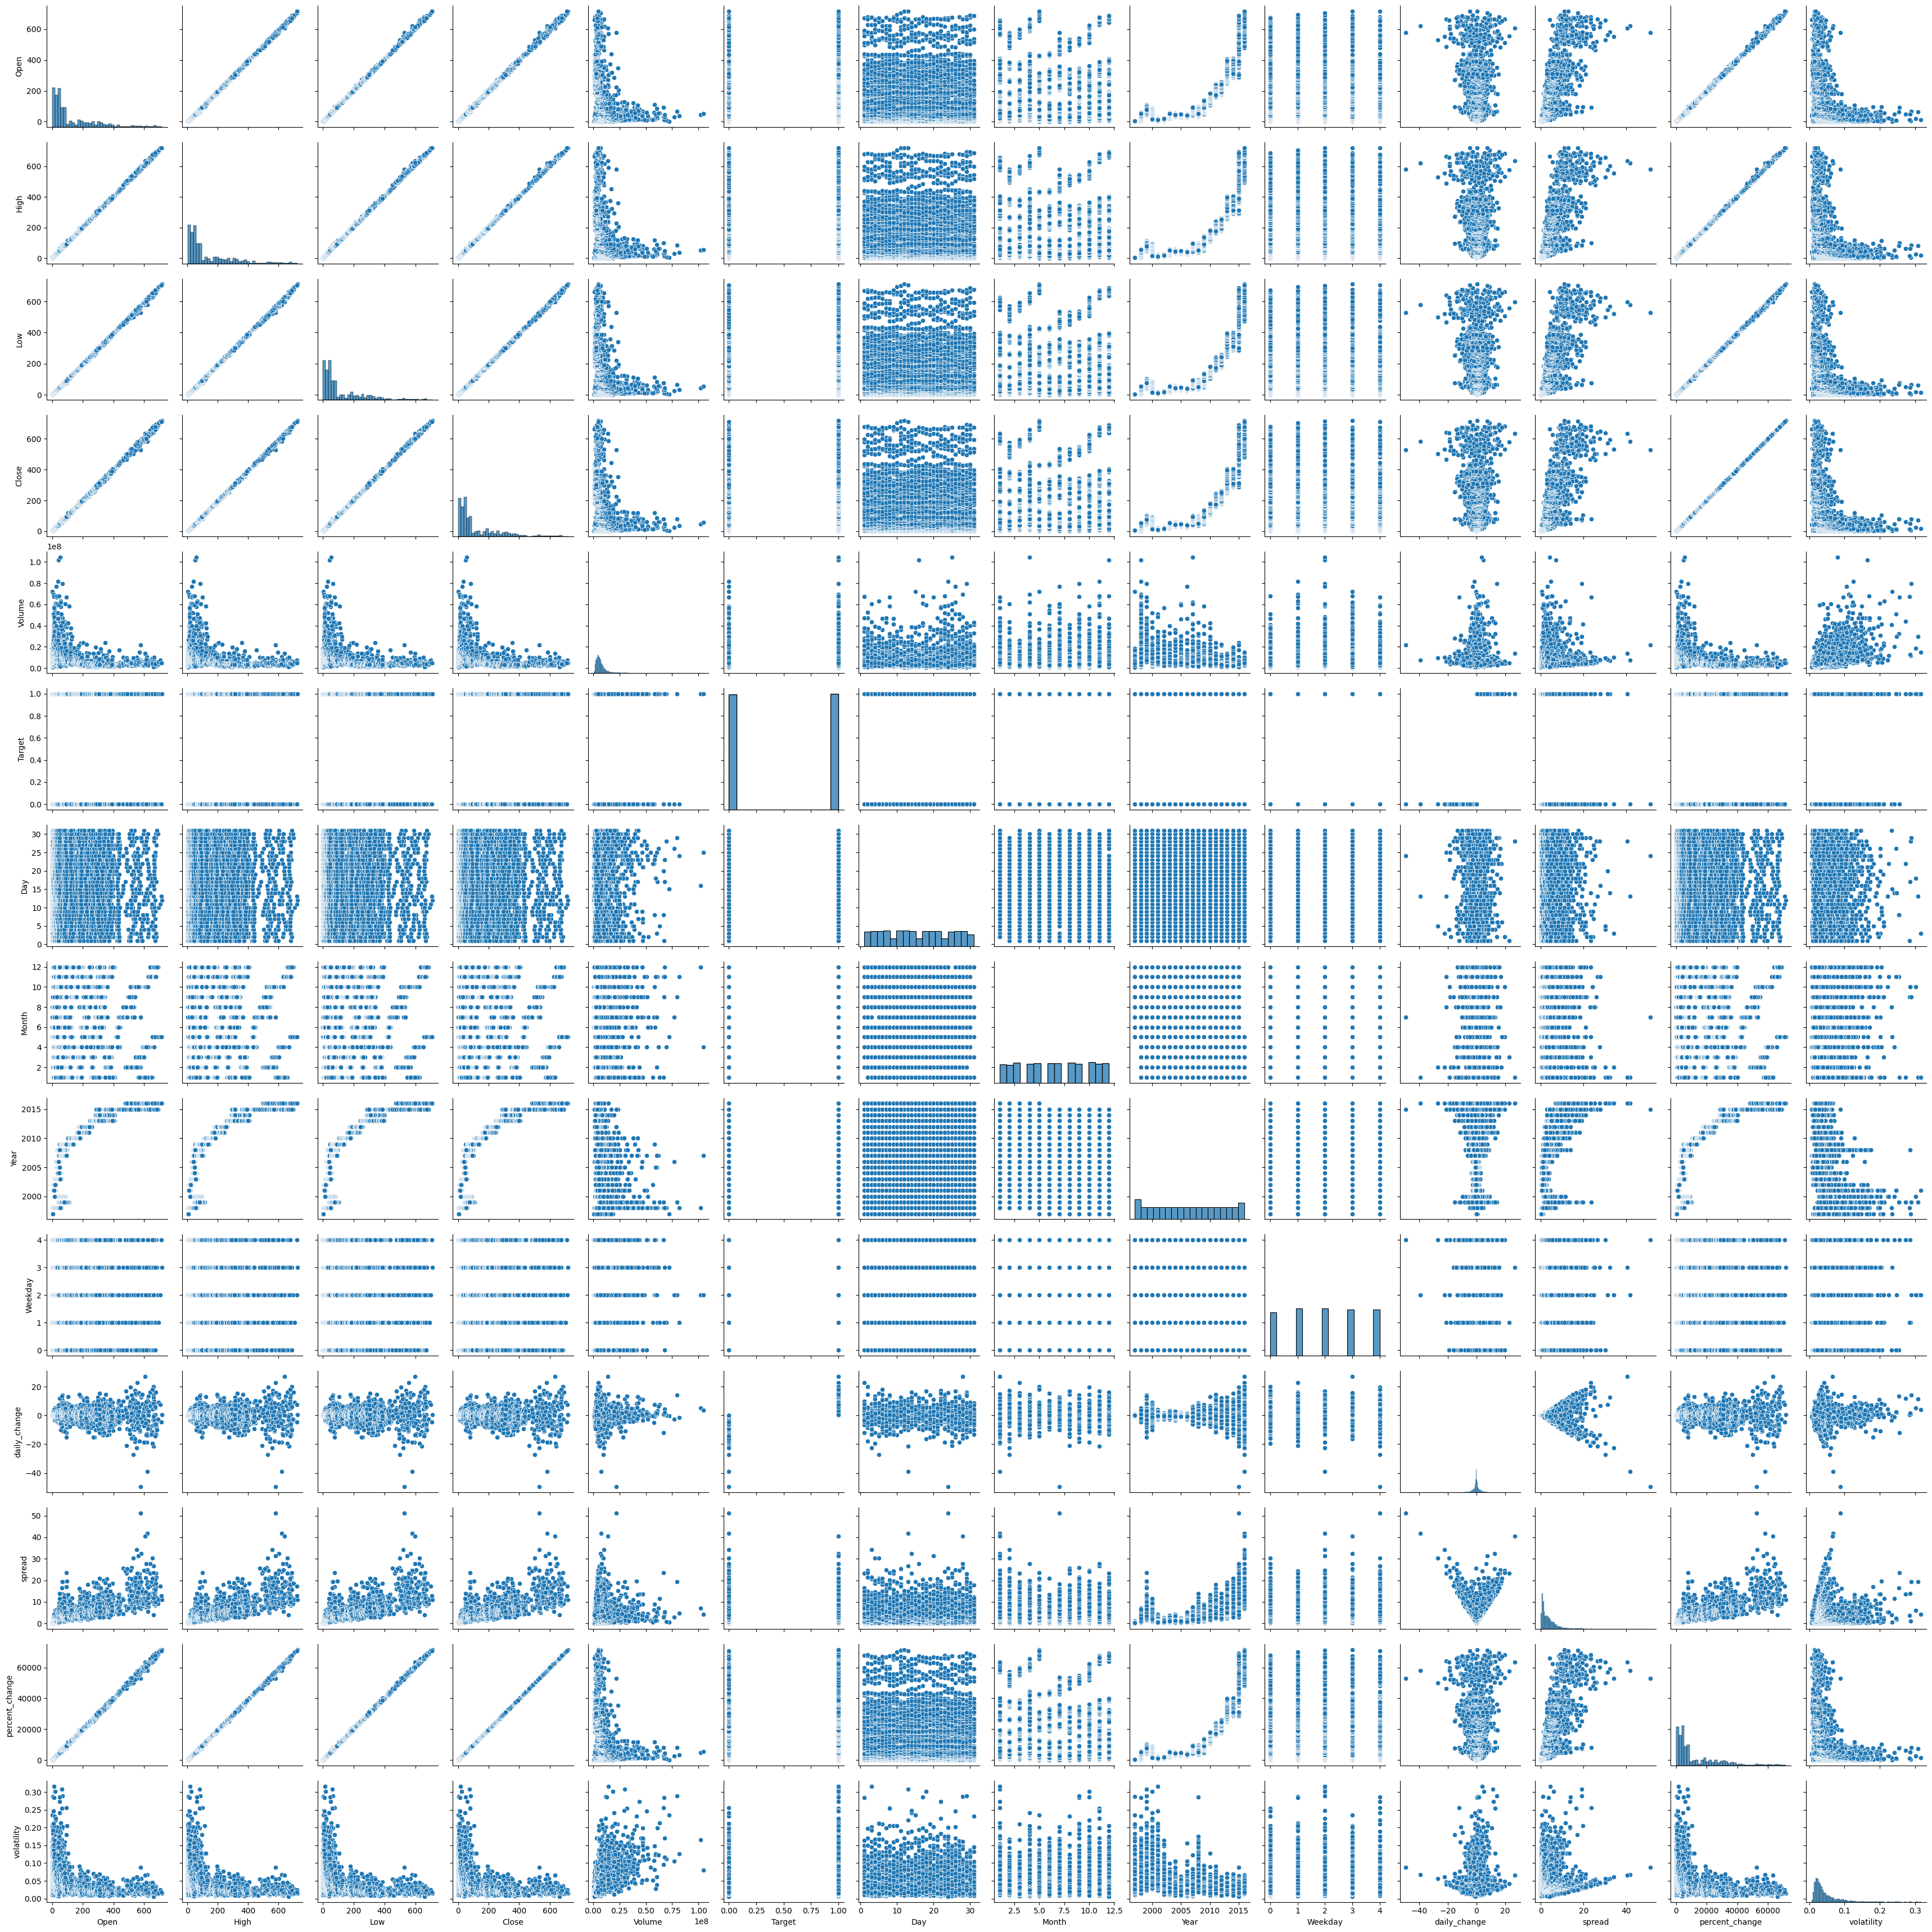

In [21]:
#pairplot

sns.pairplot(df)


In [28]:
from sklearn.preprocessing import StandardScaler
X_train = df.drop(columns=['Target'])
y_train = df['Target']

X_val = df2.drop(columns=['Target'])
y_val = df2['Target']

X_test = df3.drop(columns=['Target'])
y_test = df3['Target']

# Initialize StandardScaler
scaler = StandardScaler()

# Fit_transform
X_train_scaled = scaler.fit_transform(X_train)

#transform
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [29]:
X_train_scaled

array([[-0.85930942, -0.86312251, -0.8592896 , ..., -0.8034803 ,
        -0.86297182,  5.52244557],
       [-0.86252713, -0.86666277, -0.86080829, ..., -0.87911026,
        -0.86455082,  2.70361362],
       [-0.86395723, -0.86807888, -0.86138683, ..., -0.91040571,
        -0.86468812,  1.12102894],
       ...,
       [ 3.96882677,  4.00714589,  3.99859643, ...,  3.39684999,
         4.02003426, -0.56367241],
       [ 4.04838607,  4.03059667,  4.06705022, ...,  1.79203904,
         4.05230067, -0.83354794],
       [ 4.02957751,  4.00884521,  4.03233729, ...,  2.24268681,
         3.99731047, -0.75902012]])

In [30]:
X_val_scaled

array([[ 3.99861872,  3.96806139,  3.98908512, ...,  2.3002652 ,
         4.00239071, -0.74638068],
       [ 3.99704002,  3.9763539 ,  3.94486047, ...,  4.20051603,
         3.89673539, -0.4370264 ],
       [ 3.85741669,  3.89526211,  3.90910641, ...,  2.5030573 ,
         3.91170151, -0.69665628],
       ...,
       [10.16530777, 10.10160859, 10.25934962, ...,  2.09748838,
        10.17021773, -1.0559277 ],
       [10.18253764, 10.07102072, 10.22081878, ...,  2.36034947,
        10.12785948, -1.03742161],
       [10.13455512, 10.07156503, 10.235815  , ...,  1.83960849,
        10.11845417, -1.07388724]])

In [31]:
X_test_scaled

array([[10.02335117,  9.91264403,  9.99400423, ...,  4.70626637,
         9.94394095, -0.86330341],
       [ 9.95264688,  9.95771019, 10.07349733, ...,  3.49950673,
        10.02055651, -0.94897781],
       [ 9.97365254,  9.95505914, 10.04801774, ...,  4.32069984,
         9.98266064, -0.88959637],
       ...,
       [15.68001122, 15.56256287, 15.47711924, ..., 15.07622173,
        15.30448988, -0.50718679],
       [15.37076688, 15.485753  , 15.35770712, ..., 16.55333026,
        15.37980105, -0.4204944 ],
       [15.33102138, 15.37475415, 15.46469174, ...,  8.60691865,
        15.52348955, -0.80715438]])

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}
results = {}

# Train and evaluate models
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)

    # predictions on the validation set
    y_val_pred = model.predict(X_val_scaled)
    y_val_prob = model.predict_proba(X_val_scaled)[:, 1] if hasattr(model, 'predict_proba') else y_val_pred  # Probabilities for the positive class

    # Evaluate the model on validation set
    accuracy = accuracy_score(y_val, y_val_pred)
    conf_matrix = confusion_matrix(y_val, y_val_pred)
    class_report = classification_report(y_val, y_val_pred)

    # results for validation
    results[model_name] = {
        'Validation Accuracy': accuracy,
        'Validation Confusion Matrix': conf_matrix,
        'Validation Classification Report': class_report
    }

    # Now evaluate the model on the test set
    y_test_pred = model.predict(X_test_scaled)
    y_test_prob = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, 'predict_proba') else y_test_pred
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_conf_matrix = confusion_matrix(y_test, y_test_pred)
    test_class_report = classification_report(y_test, y_test_pred)

    # Store results for test set
    results[model_name].update({
        'Test Accuracy': test_accuracy,
        'Test Confusion Matrix': test_conf_matrix,
        'Test Classification Report': test_class_report
    })

# Display results for all models
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"Validation Accuracy: {metrics['Validation Accuracy']}")
    print("Validation Confusion Matrix:")
    print(metrics['Validation Confusion Matrix'])
    print("Validation Classification Report:")
    print("="*60)
    print("="*60)
    print(metrics['Validation Classification Report'])
    print(f"Test Accuracy: {metrics['Test Accuracy']}")
    print("Test Confusion Matrix:")
    print(metrics['Test Confusion Matrix'])
    print("Test Classification Report:")
    print(metrics['Test Classification Report'])
    print("="*60)



Model: Logistic Regression
Validation Accuracy: 0.9880715705765407
Validation Confusion Matrix:
[[254   0]
 [  6 243]]
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       254
           1       1.00      0.98      0.99       249

    accuracy                           0.99       503
   macro avg       0.99      0.99      0.99       503
weighted avg       0.99      0.99      0.99       503

Test Accuracy: 0.9861111111111112
Test Confusion Matrix:
[[249   0]
 [  7 248]]
Test Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       249
           1       1.00      0.97      0.99       255

    accuracy                           0.99       504
   macro avg       0.99      0.99      0.99       504
weighted avg       0.99      0.99      0.99       504

Model: Random Forest
Validation Accuracy: 1.0
Validation Confusion Matrix:
[[254   0]

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
}
#initialize
logreg = LogisticRegression()
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the GridSearchCV object on the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# best parameters and the best cross-validation score
print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score}")

best_logreg_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_test_pred = best_logreg_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_class_report = classification_report(y_test, y_test_pred)

print(f"Test Accuracy: {test_accuracy}")
print("Test Confusion Matrix:")
print(test_conf_matrix)
print("Test Classification Report:")
print(test_class_report)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-Validation Score: 0.9964441704594641
Test Accuracy: 0.9940476190476191
Test Confusion Matrix:
[[249   0]
 [  3 252]]
Test Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       249
           1       1.00      0.99      0.99       255

    accuracy                           0.99       504
   macro avg       0.99      0.99      0.99       504
weighted avg       0.99      0.99      0.99       504



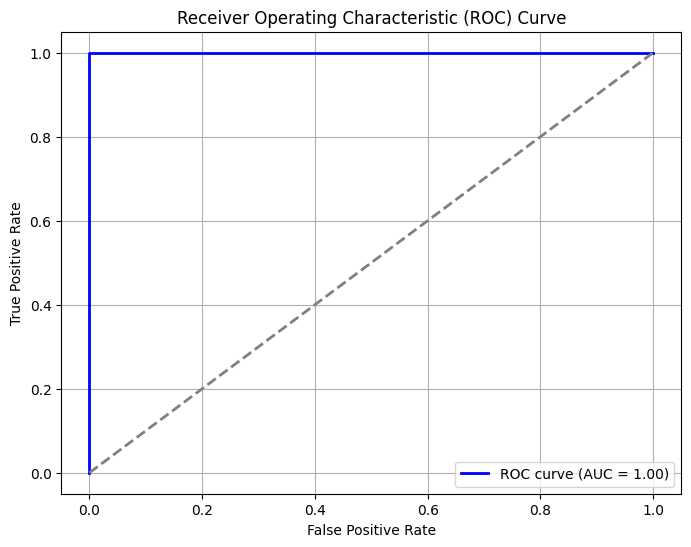

Validation AUC: 1.00


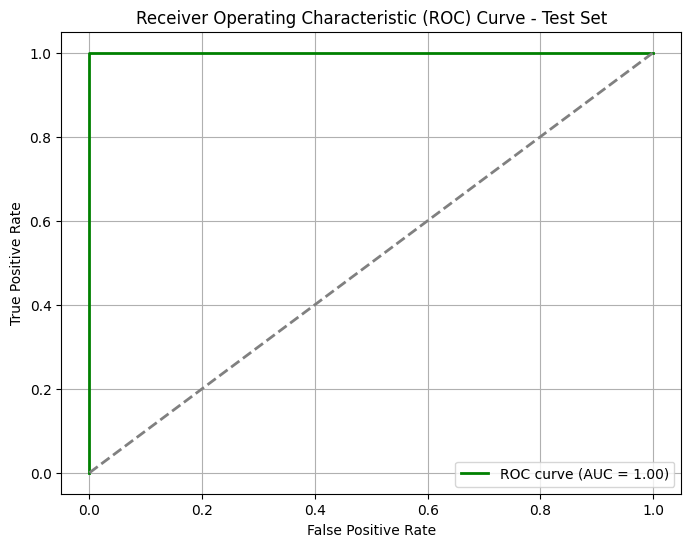

Test AUC: 1.00


In [50]:
#roc -auc curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_val_prob = best_logreg_model.predict_proba(X_val_scaled)[:, 1]

# Compute ROC curve and AUC for the validation set
fpr, tpr, thresholds = roc_curve(y_val, y_val_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve for the validation set
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print(f"Validation AUC: {roc_auc:.2f}")

y_test_prob = best_logreg_model.predict_proba(X_test_scaled)[:, 1]
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_prob)
roc_auc_test = auc(fpr_test, tpr_test)

#  ROC curve for the test set
plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, color='green', lw=2, label=f'ROC curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Test Set')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Print AUC score for the test set
print(f"Test AUC: {roc_auc_test:.2f}")
